In [35]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed
from sklearn import datasets
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.linear_model import Perceptron, RANSACRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.pipeline import Pipeline
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import combinations
import pyprind
import re
from nltk import PorterStemmer
from nltk import download
from nltk.corpus import stopwords

### Class: Linear Regression

In [8]:
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def fit(self,X,y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            print(cost)
            #input()
            self.cost_.append(cost)
        
        return self
    
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)
        
        
        
        
    
    

### Function: Visualize Regression

In [9]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

In [10]:
# read the dataset using pandas

df = pd.read_csv('hous ing.data',header = None, sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
              'TAX','PTRATIO','B','LSTAT','MEDV']

df.head(3)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [11]:
print('Number of training data: %d'%(df.shape[0]))
print('Number of training features: %d'%(df.shape[1]))

Number of training data: 506
Number of training features: 14


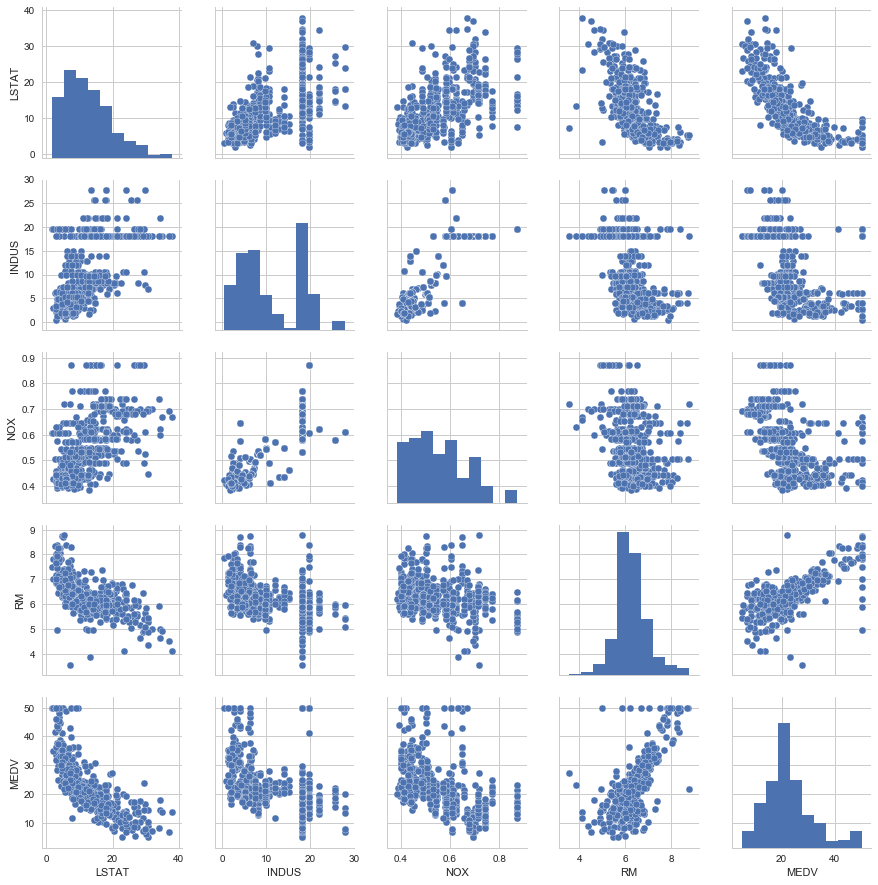

In [12]:
# visualize the data 
sns.set(style = 'whitegrid', context = 'notebook')
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)
plt.show()

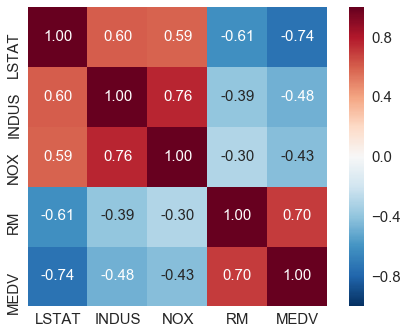

In [13]:
# Visualize the correlation between the features 

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, 
                 cbar = True,
                 annot = True,
                 square = True, 
                 fmt = '.2f',
                 annot_kws = {'size':15},
                 yticklabels = cols,
                 xticklabels = cols)
        
plt.show()
        

/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(506, 1)
253.0
160.521457033
137.953363322
132.445936005
131.101925472
130.773938518
130.693897893
130.6743651
130.669598395
130.668435147
130.668151273
130.668081997
130.668065092
130.668060966
130.668059959
130.668059714
130.668059654
130.668059639
130.668059635
130.668059634


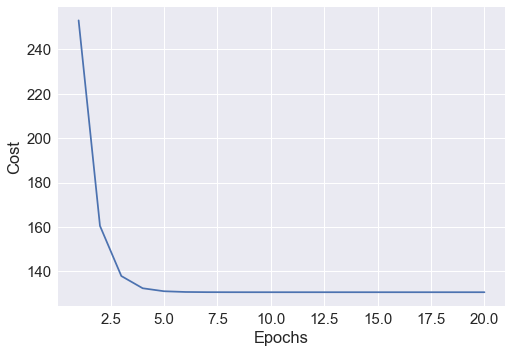

In [14]:
# Example of linear regression 

X = df[['RM']].values
y = df['MEDV'].values
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
print(X_std.shape)
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()





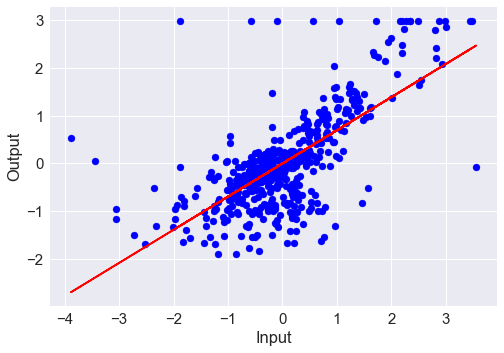

In [15]:
# Visualize the Regression line 

lin_regplot(X_std,y_std,lr)
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

Slope: 9.102
Intercept: -34.671


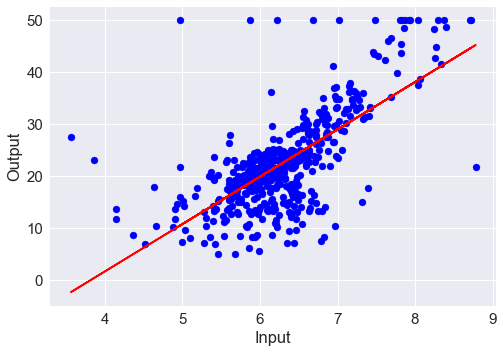

In [16]:
# Using scikit learns Linear regression
slr = LinearRegression()
slr.fit(X,y)
print('Slope: %.3f'% slr.coef_[0])
print('Intercept: %.3f'% slr.intercept_)

lin_regplot(X,y,slr)
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

/home/sandeepubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


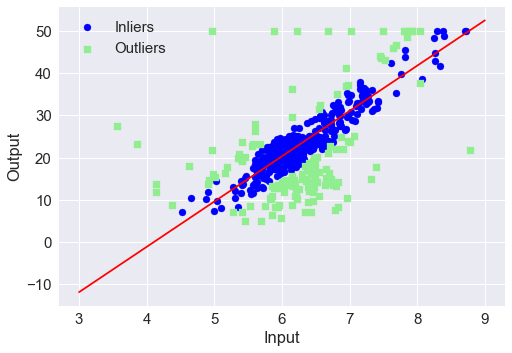

In [17]:
# RANSAC: Random Sample Concensus

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials = 100, 
                         min_samples = 50,
                         residual_metric = lambda x: np.sum(np.abs(x),axis = 1),
                         residual_threshold = 5.0,
                         random_state = 0)

ransac.fit(X,y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask], c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask], c='lightgreen',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper left')
plt.show()


In [21]:
# Linear regression on the entire dataset 

X = df.iloc[:,:-1].values
y = df['MEDV'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print('The training features is of dimension %d x %d'%(X_train.shape[0],X_train.shape[1]))
print('The test features is of dimension %d x %d'%(X_test.shape[0],X_test.shape[1]))


The training features is of dimension 354 x 13
The test features is of dimension 152 x 13


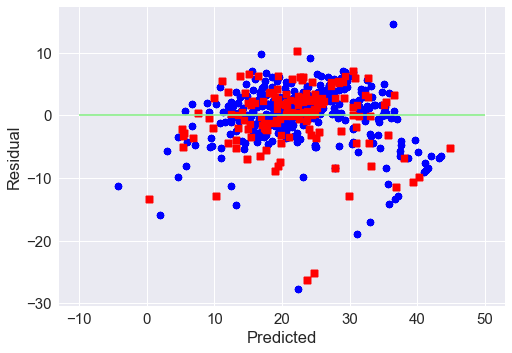

In [26]:
# Linear Regression
slr = LinearRegression()
slr.fit(X_train,y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Plot the residuals of predicted and real outcomes vs predicted
plt.scatter(y_train_pred, y_train_pred - y_train,color='blue',marker='o',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,color='red',marker='s',label='Test data')
plt.hlines(y=0,xmin=-10,xmax=50,color='lightgreen')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In [31]:
# Evaluation metrics
# 1. Mean square error:

print('MSE train: %.3f and test: %.3f '%(mean_squared_error(y_train,y_train_pred),
                                         mean_squared_error(y_test,y_test_pred)))

# 2. R^2 score = 1 - (MSE/Var) 
print('R2 train: %.3f and test: %.3f '%(r2_score(y_train,y_train_pred),
                                         r2_score(y_test,y_test_pred)))

MSE train: 19.958 and test: 27.196 
R2 train: 0.765 and test: 0.673 


### Polynomial Features

In [43]:
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0])[:,np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,343.2,360.8,368.0,391.2,390.8])

print('Features dimension: %d'%(len(X)))
print('Values dimension: %d'%(len(y)))

# Linear
lr = LinearRegression()
lr.fit(X,y)
X_fit = np.arange(250,600,10)[:,np.newaxis]
y_lin_fit = lr.predict(X_fit)



Features dimension: 10
Values dimension: 10


In [45]:
# Polynomial
pr = LinearRegression()
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quad.fit_transform(X_fit))


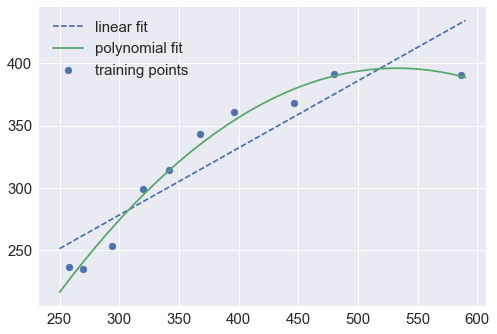

In [47]:
# Plot
plt.scatter(X,y,label='training points')
plt.plot(X_fit,y_lin_fit, label='linear fit', linestyle = '--')
plt.plot(X_fit,y_quad_fit, label='polynomial fit')
plt.legend(loc='upper left')
plt.show()

In [51]:
# Evaluation metrics
# 1. Mean square error:
y_lin_fit = lr.predict(X)
y_quad_fit = pr.predict(X_quad)
print('MSE Linear: %.3f and Polynomial: %.3f '%(mean_squared_error(y,y_lin_fit),
                                         mean_squared_error(y,y_quad_fit)))

# 2. R^2 score = 1 - (MSE/Var) 
print('R2 Linear: %.3f and Polynomial: %.3f '%(r2_score(y,y_lin_fit),
                                         r2_score(y,y_quad_fit)))

MSE Linear: 575.386 and Polynomial: 62.883 
R2 Linear: 0.830 and Polynomial: 0.981 


In [67]:
# Housing dataset using polynomial curve

X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

# Create polynomial features
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Sample test
X_fit = np.arange(X.min(), X.max(), 1)[:,np.newaxis]


In [68]:
# Linear Fit
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# Quadratic
regr =regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quad_r2 = r2_score(y, regr.predict(X_quad))

# Cubic
regr =regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

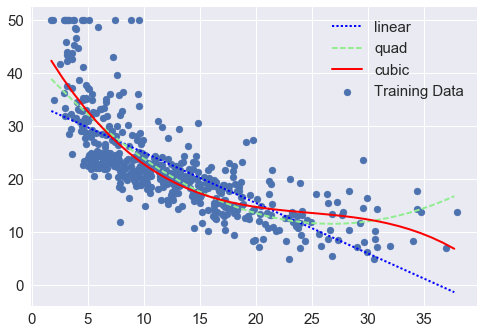

In [72]:
# Plot 
plt.scatter(X,y,label='Training Data')
plt.plot(X_fit, y_lin_fit, label='linear', color = 'blue', linestyle=':',lw=2)
plt.plot(X_fit, y_quad_fit, label='quad', color = 'lightgreen', linestyle='--',lw=2)
plt.plot(X_fit, y_cubic_fit, label='cubic', color = 'red',lw=2)
plt.legend(loc='upper right')
plt.show()

In [71]:
# Evaluation


# 2. R^2 score = 1 - (MSE/Var) 
print('R2 Linear: %.3f and Polynomial: %.3f and Cubic: %.3f'%(linear_r2,quad_r2,cubic_r2))


R2 Linear: 0.544 and Polynomial: 0.641 and Cubic: 0.658
